# Business and dat understanding - v1

## Purpose
Entender o [DataverseNL (2021). Detection of illicit accounts over the Ethereum blockchain](http://doi.org/10.34894/GKAQYN).

# Setup

## Library import
We import all the required Python libraries

In [19]:
import os

# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Visualizations
import plotly
import plotly.graph_objs as go
import plotly.offline as ply
plotly.offline.init_notebook_mode(connected=True)
import matplotlib as plt

from ydata_profiling import ProfileReport

# Autoreload extension
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
    
%autoreload 2

# Options for pandas
# pd.options.display.max_columns = None
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:.5f}'.format
# pd.options.display.max_rows = 120

## Local library import
We import all the required local libraries libraries

In [20]:
os.chdir('../')
from src.utils.data_describe import breve_descricao, serie_nulos, cardinalidade
os.chdir('./notebooks/')

# Parameter definition
We set all relevant parameters for our notebook. By convention, parameters are uppercase, while all the 
other variables follow Python's guidelines.

In [21]:
RAW_FOLDER = '../data/raw/'
INTERIM_FOLDER = '../data/interim/'
PROCESSED_FOLDER = '../data/processed/'
REPORTS_FOLDER = '../reports/'
RANDOM_STATE = 42


# Data import
We retrieve all the required data for the analysis.

In [22]:
try:
    df_raw = pd.read_parquet(INTERIM_FOLDER + 'ethereum_complete.pqt')
    print(f'PARQUET file loaded. Shape: {df_raw.shape}')
except FileNotFoundError as e:
    df_raw = pd.read_csv(RAW_FOLDER + 'ethereum_complete.csv')
    df_raw.drop(columns=['Index'], inplace=True)
   
    df_raw.to_parquet(INTERIM_FOLDER +  'ethereum_complete.pqt', index=False)
    print(f'EXCEL file loaded and PARQUET created. Shape: {df_raw.shape}')

PARQUET file loaded. Shape: (4681, 49)


In [23]:
display(df_raw.head(3))

,Address,FLAG,Avg_min_between_sent_tnx,Avg_min_between_received_tnx,Time_Diff_between_first_and_last_(Mins),Sent_tnx,Received_Tnx,Number_of_Created_Contracts,Unique_Received_From_Addresses,Unique_Sent_To_Addresses,min_value_received,max_value_received,avg_val_received,min_val_sent,max_val_sent,avg_val_sent,min_value_sent_to_contract,max_val_sent_to_contract,avg_value_sent_to_contract,total_transactions_(including_tnx_to_create_contract),total_Ether_sent,total_ether_received,total_ether_sent_contracts,total_ether_balance,Total_ERC20_tnxs,ERC20_total_Ether_received,ERC20_total_ether_sent,ERC20_total_Ether_sent_contract,ERC20_uniq_sent_addr,ERC20_uniq_rec_addr,ERC20_uniq_sent_addr.1,ERC20_uniq_rec_contract_addr,ERC20_avg_time_between_sent_tnx,ERC20_avg_time_between_rec_tnx,ERC20_avg_time_between_rec_2_tnx,ERC20_avg_time_between_contract_tnx,ERC20_min_val_rec,ERC20_max_val_rec,ERC20_avg_val_rec,ERC20_min_val_sent,ERC20_max_val_sent,ERC20_avg_val_sent,ERC20_min_val_sent_contract,ERC20_max_val_sent_contract,ERC20_avg_val_sent_contract,ERC20_uniq_sent_token_name,ERC20_uniq_rec_token_name,ERC20_most_sent_token_type,ERC20_most_rec_token_type
0,0x0020731604c882cf7bf8c444be97d17b19ea4316,1,1457.31000,34.12000,4815.43000,3,13,0,10,3,1.00000,2.50105,1.34844,1.00087,11.27787,5.84292,0,0,0,16,17.52875,17.52978,0,0.00104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
1,0x002bf459dc58584d58886169ea0e80f3ca95ffaf,1,3976.50000,834.77000,9622.53000,2,2,0,1,2,0.58627,0.94751,0.76689,0.58541,0.94728,0.76635,0,0,0,4,1.53269,1.53378,0,0.00109,1.00000,1.33700,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.33700,1.33700,1.33700,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,,Blockwell say NOTSAFU
2,0x002f0c8119c16d310342d869ca8bf6ace34d9c39,1,112.90000,31.87000,321.42000,2,3,0,3,1,0.00102,0.81780,0.43961,0.50039,0.81751,0.65895,0,0,0,5,1.31790,1.31882,0,0.00092,1.00000,1.33700,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.33700,1.33700,1.33700,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,,Blockwell say NOTSAFU


# Data evaluation

## Cardinality

In [24]:
df_cardinalidade = cardinalidade(df_raw).sort_values(by='Proporção Nulos', ascending=False)
df_cardinalidade

,Atributo,DType,Cardinalidade,Valores,Proporção Nulos
48,ERC20_most_rec_token_type,object,280,"[, , 0, A2A(B) STeX Exchange Token, ABCC invite, AI Gaming Coin, AICRYPTO, AION, ARP, ATLANT, ATN, AdEx, Aeternity, AirCoin, Amber, Amplify, An Etheal Promo, AppCoins, Aragon, ArtisTurba, Asobicoin promo, Authoreon, Authorship, Azbit, BAT, BAX, BBN, BCShareS, BOX Token, BUZCOIN, Bancor, Beauty Coin, BeautyChain, BigBang Game Coin Token, BinaryCoin, BitAir, BitClave, Bitcoin EOS, BizCoin, Blockwell say NOTSAFU, Blupee, Bounty, Bulleon Promo Token, CANDY, CGW, CIChain, CRYPTOPUNKS, Cai Token, CargoX, Carrots, Cashaa, Celer Network, Centra, ChainLink Token, Civic, CoinBene Coin, CoinDash, Coineal Token, CosmoCoin, Crypterium, Crypto.com, Cryptonex, CyberMiles, Cybereits Token, DALECOIN, DATAcoin, DCORP, DEBITUM, DEW, DGD, DICE, DIGIBYTE, DMTS, Dai Stablecoin v1.0, Dao.Casino, Data, Decentraland, Delphy Token, Digital Developers Fund Token, Dragon, Dropil, EBCoin, ECHARGE, ELF, EMO tokens, EOS, ERC20, ESSENTIA, EasyEosToken, Edgeless, ElectrifyAsia, Electronic Energy Coin, Energem, EnjinCoin, Enumivo, Ethbits, EtherEcash, Ethereum, Ethos, Everest, ...]",0.17859
47,ERC20_most_sent_token_type,object,172,"[, , '', 0, 21Million, AION, ARBITRAGE, AVT, AdEx, Adshares, Aeternity, AirToken, Aragon, Authorship, BAT, BCShareS, BNB, BTOCoin, BUZCOIN, Bancor, BinaryCoin, BitDice, BizCoin, Blackmoon Crypto Token, Bounty0x, Brickblock, Bytom, CANDY, CRYPTOPUNKS, CarTaxi, Cashaa, ChainLink Token, CharterCoin, Civic, Cofoundit, CoinDash, Crypterium, Crypto.com, DADI, DATAcoin, DGD, DICE, Dao.Casino, Decent.Bet Token, Decentraland, Digital Developers Fund Token, Digix Gold Token, EDT, EOS, ERC20, ETHWrapper, Electronic Energy Coin, EnjinCoin, Ether, Ethos, Fair Token, Fantom Token, Feed, Fortecoin, Friendz Coin, FunFair, GECoin, GRID, Gemini dollar, Gnosis, Golem, Guppy, Happy Coin, Hawala, Humaniq, HuobiPoolToken, HuobiToken, Hydro, IBCCoin, ICO, ICON, ICONOMI, IDICE, IOSToken, IOT Chain, IUNGO, Identity Hub Token, KickCoin, KyberNetwork, Litecoin One, Livepeer Token, Loopring, Lucky Token, Lunyr, MCAP, MEX, Magna, Master Coin, Mavrodi, Merculet, Mithril Token, MobileGo, Monetha, NOAHCOIN, NaN, ...]",0.17731
36,ERC20_min_val_rec,float64,continuous,"[0.0, 990000.0]",0.17710
38,ERC20_avg_val_rec,float64,continuous,"[0.0, 17241810275.0]",0.17710
41,ERC20_avg_val_sent,float64,continuous,"[0.0, 56147560976.0]",0.17710
44,ERC20_avg_val_sent_contract,float64,continuous,"[0.0, 0.0]",0.17710
37,ERC20_max_val_rec,float64,continuous,"[0.0, 1000000000000.0]",0.17710
28,ERC20_uniq_sent_addr,float64,continuous,"[0.0, 1486.0]",0.17710
43,ERC20_max_val_sent_contract,float64,continuous,"[0.0, 0.0]",0.17710
40,ERC20_max_val_sent,float64,continuous,"[0.0, 112000000000.0]",0.17710


### Removing features with unitary cardinalities

In [26]:
lst_columns_constant = df_cardinalidade.loc[df_cardinalidade['Cardinalidade'] == 1, 'Atributo'].values.tolist()
lst_columns_to_drop = ['Address', *df_raw.select_dtypes(include='object').columns.tolist()]
df_evaluation = df_raw.drop(columns=[*lst_columns_constant, *lst_columns_to_drop])

## Auto EDA with ydata

In [8]:
profile = ProfileReport(
    df_evaluation.select_dtypes(include='float').sample(300, random_state=RANDOM_STATE),
    title="Profiling Report")

# profile.to_file(REPORTS_FOLDER + 'data_analysis_report.html')
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

D:\Users\n29623\AppData\Local\Programs\Python\Python310\lib\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

## Conclusion



# Data cleaning

## Duplicated registries

In [27]:
print(f'Shape before data cleasing: {df_evaluation.shape}')

df_evaluation.drop_duplicates(inplace=True)

print(f'After duplicates dropping: {df_evaluation.shape}')

Shape before data cleasing: (4681, 42)
After duplicates dropping: (4153, 42)


## Constant columns

In [28]:
df_evaluation.drop(columns=[
    'ERC20_avg_time_between_sent_tnx',
    'ERC20_avg_time_between_rec_tnx',
    'ERC20_avg_time_between_rec_2_tnx',
    'ERC20_avg_time_between_contract_tnx',
    'ERC20_min_val_sent_contract',
    'ERC20_max_val_sent_contract',
    'ERC20_avg_val_sent_contract',
], inplace=True)

print(f'After dropping constant columns: {df_evaluation.shape}')

After dropping constant columns: (4153, 35)


# Testing with pycaret

In [30]:
# df_evaluation = df_raw.iloc[:, 1:]
df_evaluation.head()

,FLAG,Avg_min_between_sent_tnx,Avg_min_between_received_tnx,Time_Diff_between_first_and_last_(Mins),Sent_tnx,Received_Tnx,Number_of_Created_Contracts,Unique_Received_From_Addresses,Unique_Sent_To_Addresses,min_value_received,max_value_received,avg_val_received,min_val_sent,max_val_sent,avg_val_sent,total_transactions_(including_tnx_to_create_contract),total_Ether_sent,total_ether_received,total_ether_balance,Total_ERC20_tnxs,ERC20_total_Ether_received,ERC20_total_ether_sent,ERC20_total_Ether_sent_contract,ERC20_uniq_sent_addr,ERC20_uniq_rec_addr,ERC20_uniq_sent_addr.1,ERC20_uniq_rec_contract_addr,ERC20_min_val_rec,ERC20_max_val_rec,ERC20_avg_val_rec,ERC20_min_val_sent,ERC20_max_val_sent,ERC20_avg_val_sent,ERC20_uniq_sent_token_name,ERC20_uniq_rec_token_name
0,1,1457.31000,34.12000,4815.43000,3,13,0,10,3,1.00000,2.50105,1.34844,1.00087,11.27787,5.84292,16,17.52875,17.52978,0.00104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,3976.50000,834.77000,9622.53000,2,2,0,1,2,0.58627,0.94751,0.76689,0.58541,0.94728,0.76635,4,1.53269,1.53378,0.00109,1.00000,1.33700,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,1.33700,1.33700,1.33700,0.00000,0.00000,0.00000,0.00000,1.00000
2,1,112.90000,31.87000,321.42000,2,3,0,3,1,0.00102,0.81780,0.43961,0.50039,0.81751,0.65895,5,1.31790,1.31882,0.00092,1.00000,1.33700,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,1.33700,1.33700,1.33700,0.00000,0.00000,0.00000,0.00000,1.00000
3,1,2300.37000,65.10000,73091.00000,29,98,0,89,26,0.00078,15.72907,0.38322,0.00000,36.70000,1.31496,127,38.13377,37.55605,-0.57772,96.00000,142677.38290,120354.76840,0.00000,6.00000,55.00000,0.00000,37.00000,0.00000,26436.08100,1954.48470,0.00000,81324.07460,5232.81602,22.00000,37.00000
4,1,0.00000,0.00000,0.00000,0,0,0,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
from pycaret.classification import ClassificationExperiment

exp = ClassificationExperiment()
exp.setup(df_evaluation, target='FLAG', session_id=RANDOM_STATE);

,Description,Value
0,Session id,42
1,Target,FLAG
2,Target type,Binary
3,Original data shape,"(4153, 35)"
4,Transformed data shape,"(4153, 35)"
5,Transformed train set shape,"(2907, 35)"
6,Transformed test set shape,"(1246, 35)"
7,Numeric features,34
8,Rows with missing values,13.2%
9,Preprocess,True


In [36]:
best = exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9821,0.9984,0.9776,0.9777,0.9776,0.9627,0.9628,0.2080
catboost,CatBoost Classifier,0.9821,0.9985,0.9776,0.9777,0.9776,0.9627,0.9628,2.7360
xgboost,Extreme Gradient Boosting,0.9800,0.9981,0.9733,0.9768,0.9749,0.9584,0.9585,0.2670
gbc,Gradient Boosting Classifier,0.9780,0.9977,0.9733,0.9718,0.9724,0.9541,0.9542,0.4580
rf,Random Forest Classifier,0.9752,0.9976,0.9672,0.9706,0.9688,0.9483,0.9484,0.2900
ada,Ada Boost Classifier,0.9732,0.9955,0.9681,0.9651,0.9664,0.9441,0.9443,0.1970
et,Extra Trees Classifier,0.9697,0.9969,0.9569,0.9670,0.9618,0.9367,0.9369,0.2610
dt,Decision Tree Classifier,0.9456,0.9424,0.9266,0.9365,0.9314,0.8864,0.8866,0.1090
knn,K Neighbors Classifier,0.8782,0.9356,0.8447,0.8496,0.8467,0.7457,0.7462,0.1080
svm,SVM - Linear Kernel,0.7678,0.0000,0.5401,0.8159,0.6465,0.4855,0.5101,0.1050


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

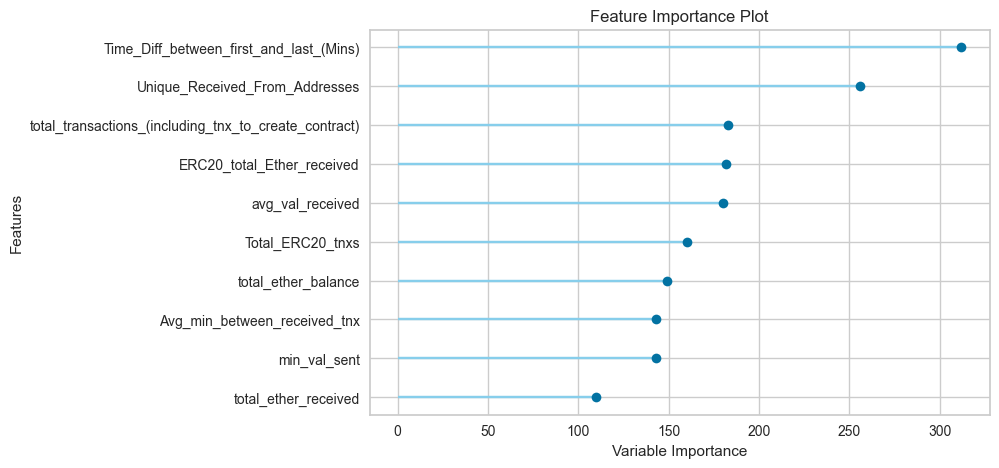

In [38]:
exp.plot_model(best, plot='feature')

# Data processing
Put here the core of the notebook. Feel free di further split this section into subsections.

# References
We report here relevant references:
1. author1, article1, journal1, year1, url1
2. author2, article2, journal2, year2, url2